### Getting the data from web.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
%matplotlib inline

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
style.use("ggplot")

In [3]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader("TSLA",'yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002


### Converting the data to csv and then reading it and making a simple plot

In [5]:
df.to_csv("tsla.csv")

In [6]:
data=pd.read_csv("tsla.csv",parse_dates=True,index_col=0)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


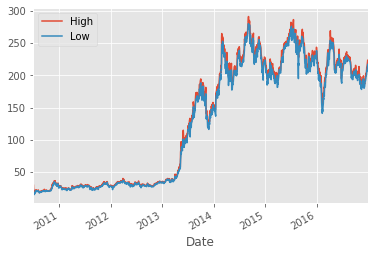

In [7]:
data[["High","Low"]].plot()

### Creating a new column and visualisation using Matplotlib

In [8]:
#ma is moving avg, which takes the last x values of a particular feature and averages it. 
data["100ma"] = data["Adj Close"].rolling(window=100,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


In [9]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,202.6190
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993,202.2905
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366


<BarContainer object of 1640 artists>

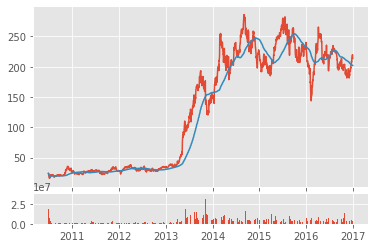

In [10]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)

ax1.plot(data.index,data["Adj Close"])
ax1.plot(data.index,data["100ma"])
ax2.bar(data.index,data["Volume"])

In [11]:
df_ohlc = data["Adj Close"].resample("10D").ohlc()
df_volume = data["Volume"].resample("10D").sum()

In [12]:
df_ohlc.reset_index(inplace=True)

In [13]:
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [14]:
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

In [15]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


In [17]:
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup="g")
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.savefig('mpl_finance-tsla.png')

<Figure size 432x288 with 0 Axes>